In [1]:
import sys
sys.path.append('/Users/adnansiddiquei/Desktop/Cambridge/M1/as3438/src')

import warnings
warnings.filterwarnings('ignore')
from utils import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
from src import *
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.neighbors import KernelDensity, LocalOutlierFactor
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
def compute_outliers(data: np.ndarray):
    data = data.copy()
    
    z_scores = StandardScaler().fit_transform(data)
    outliers = np.abs(z_scores) > 3
    
    pct_outliers = np.sum(outliers) / np.prod(outliers.shape)

    return outliers, z_scores, pct_outliers

In [17]:
data = pd.read_csv('./q3/outputs/knn_imputed_data.csv', index_col=0)
data, classifications = data[data.columns[:-1]], data['classification']

data = data[data.columns[:50]]

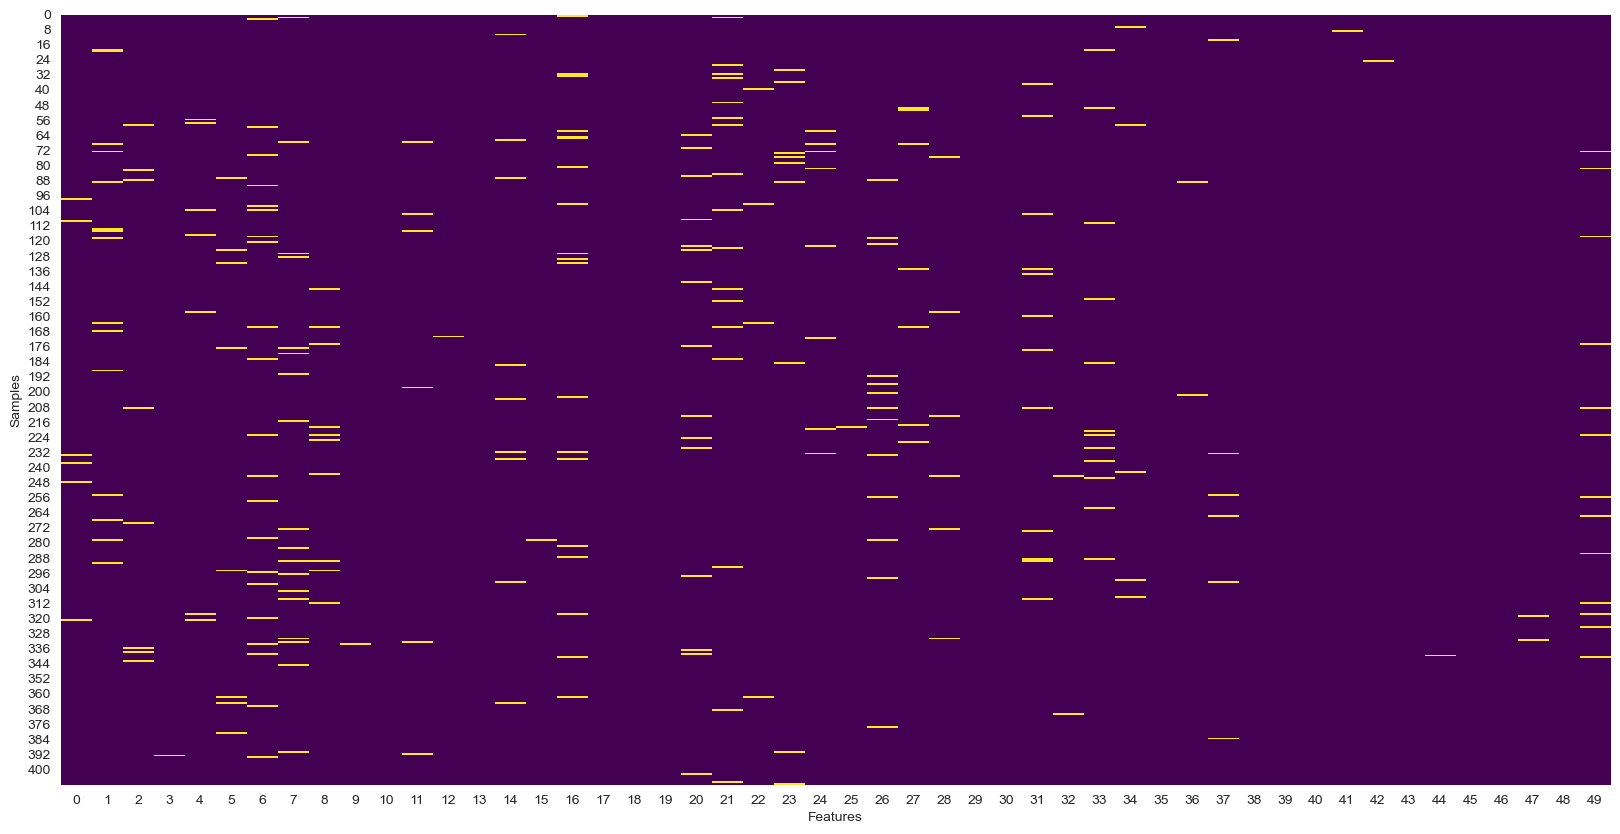

In [18]:
outliers, z_scores, pct_outliers = compute_outliers(data.values)

# Create the heatmap using seaborn
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(outliers, cmap='viridis', cbar=False)
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()
format_axes(ax)

In [23]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Assuming 'data' is your DataFrame and 'outliers' is a boolean DataFrame where True indicates an outlier

# Replace outliers with NaN for imputation
data[outliers] = np.nan

# Initialize the IterativeImputer with a Random Forest estimator
imp = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10), max_iter=10, random_state=0)

# Fit the imputer on the dataset - this step will perform the imputation
imputed_data = imp.fit_transform(data)

# Convert the imputed data back to a pandas DataFrame
imputed_data = pd.DataFrame(imputed_data, columns=data.columns)

# Now, 'imputed_data' contains the original data with outliers replaced by the imputed values

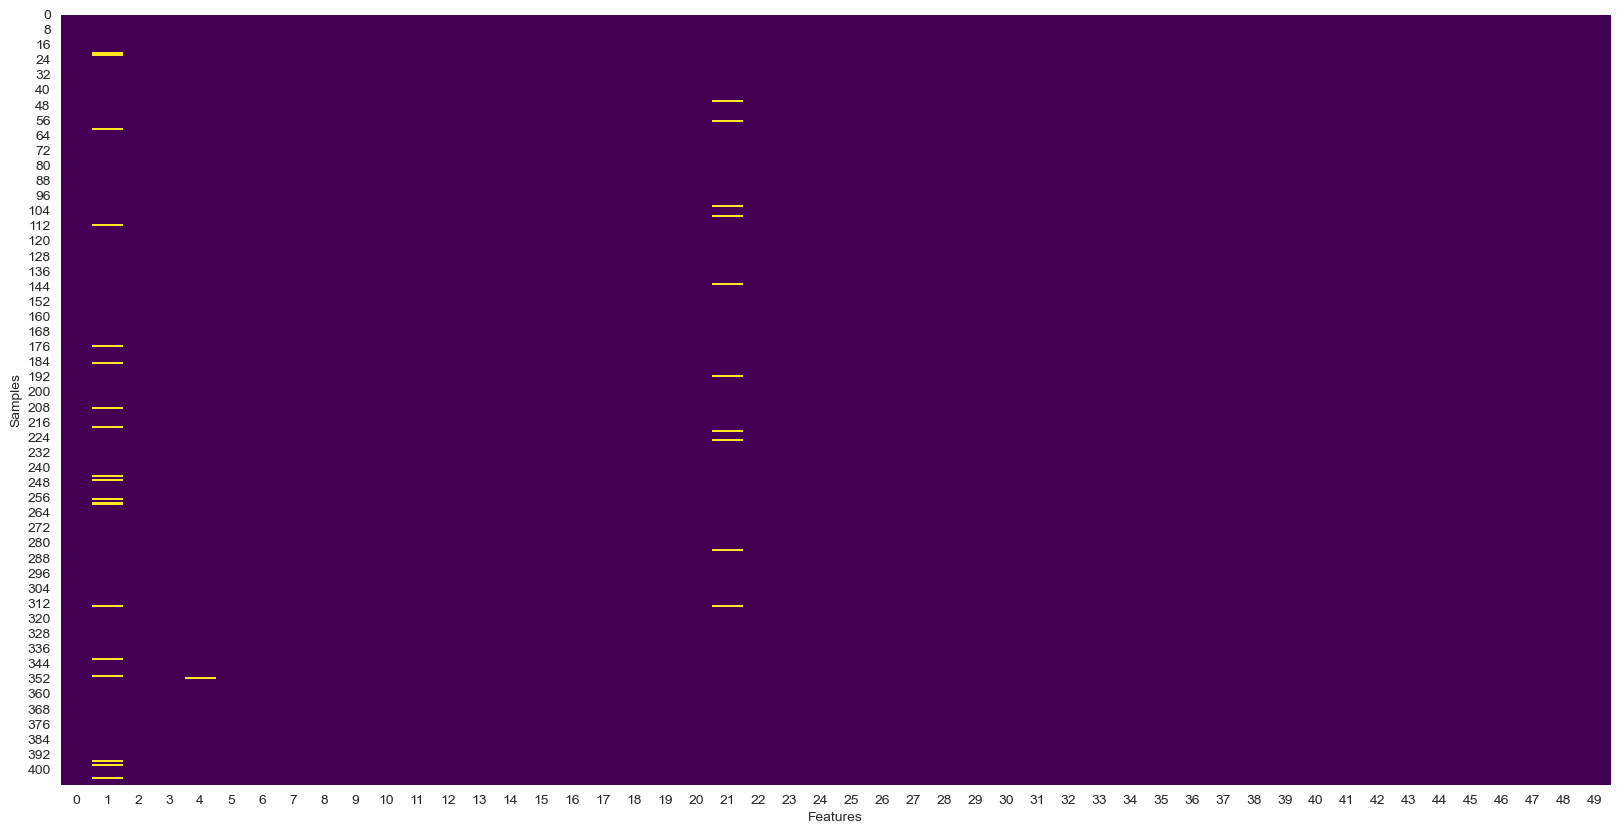

In [24]:
outliers, z_scores, pct_outliers = compute_outliers(data.values)

# Create the heatmap using seaborn
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(outliers, cmap='viridis', cbar=False)
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()
format_axes(ax)